# Pharmaceuticals analysis
For this analysis, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how the treatments compare according to to the following:
* The most important drugs are Capomulin, Infubinol, Ketapril, and Placebo
* to show how the tumor volume changes over time for each treatment.
* to show how the number of metastatic (cancer spreading) sites changes over time for each treatment.
* to show the number of mice still alive through the course of treatment (Survival Rate)
* to compare the total % tumor volume change for each of the most important drugs across the full 45 days.

# Main observations
Scatter plot and error bars were used to visualize the tumor volume changes over time, after analyzing the plot the following was concluded:
* From the main drugs, only Capomulin reduced the tumor volume.

* From the 10 drugs, only Capomulin and Ramicane reduced the tumor volume.

* The tumor volume variability increased along the time for all drugs.


Scatter plot and error bars also were used to visualize the number of metastatic sites changes over time, after analyzing the plot the following was concluded:
* From the main drugs, Capomulin showed the lowest increase of metastatic and Placebo the higher increase.

* From the 10 drugs, Capomulin and Ramicane showed the lowest increases and Placebo and Ketapril the higher increases.

* The number of metastatic sites variability was high in general for all drugs and also increased along the time.

Other observation from the main drugs
* The survival rate for the mice which were medicated with Capomulin was over 80%, while the survival rate for other mice was above 50%

In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from copy import copy

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the datasets into a single dataset
dataset = pd.merge(mouse_drug, clinical_trial, on="Mouse ID", how="outer")
dataset.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [47]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug_tp = dataset.groupby(['Drug', 'Timepoint'])
mean_tumor = pd.DataFrame(grouped_drug_tp["Tumor Volume (mm3)"].mean()).reset_index()
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [48]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = pd.DataFrame(grouped_drug_tp["Tumor Volume (mm3)"].sem()).reset_index()
sem_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [49]:
# Create a dataframe wich contains a column for each drug storing the estandar error of "Tumor Volume"
sem_tumor_columns = sem_tumor.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
sem_tumor_columns.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [50]:
# Create a dataframe wich contains a column for each drug storing the value of "Tumor Volume"
mean_tumor_columns = mean_tumor.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_tumor_columns

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


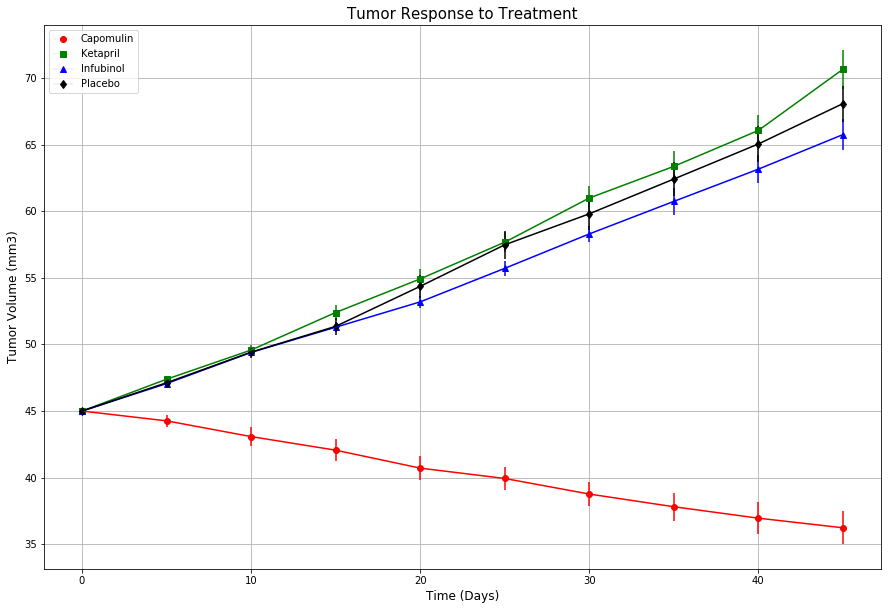

In [51]:
#Depict the tumor volume over time for the main four treatments and its standard error

plt.figure(figsize=(15, 10))

Capomulin = plt.plot( mean_tumor_columns.index, mean_tumor_columns.loc[:,"Capomulin"].values,\
                     color="red", label="Capomulin", marker="o", linewidth=.1)
plt.errorbar(mean_tumor_columns.index, mean_tumor_columns.loc[:,"Capomulin"].values,\
             yerr=sem_tumor_columns.loc[:,"Capomulin"].values, color="red")

Ketapril = plt.plot( mean_tumor_columns.index, mean_tumor_columns.loc[:,"Ketapril"].values,\
                    color="green", label="Ketapril", marker="s", linewidth=.1)
plt.errorbar(mean_tumor_columns.index, mean_tumor_columns.loc[:,"Ketapril"].values,\
             yerr=sem_tumor_columns.loc[:,"Ketapril"].values, color="green")

Ceftamin = plt.plot( mean_tumor_columns.index, mean_tumor_columns.loc[:,"Infubinol"].values,\
                    color="blue", label="Infubinol", marker="^", linewidth=.1)
plt.errorbar(mean_tumor_columns.index, mean_tumor_columns.loc[:,"Infubinol"].values,\
             yerr=sem_tumor_columns.loc[:,"Infubinol"].values, color="blue")

Placebo = plt.plot( mean_tumor_columns.index, mean_tumor_columns.loc[:,"Placebo"].values,\
                    color="black", label="Placebo", marker="d", linewidth=.1)
plt.errorbar(mean_tumor_columns.index, mean_tumor_columns.loc[:,"Placebo"].values,\
             yerr=sem_tumor_columns.loc[:,"Placebo"].values, color="black")


plt.grid()
plt.legend(loc="best" )

plt.title("Tumor Response to Treatment", fontsize=15)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()


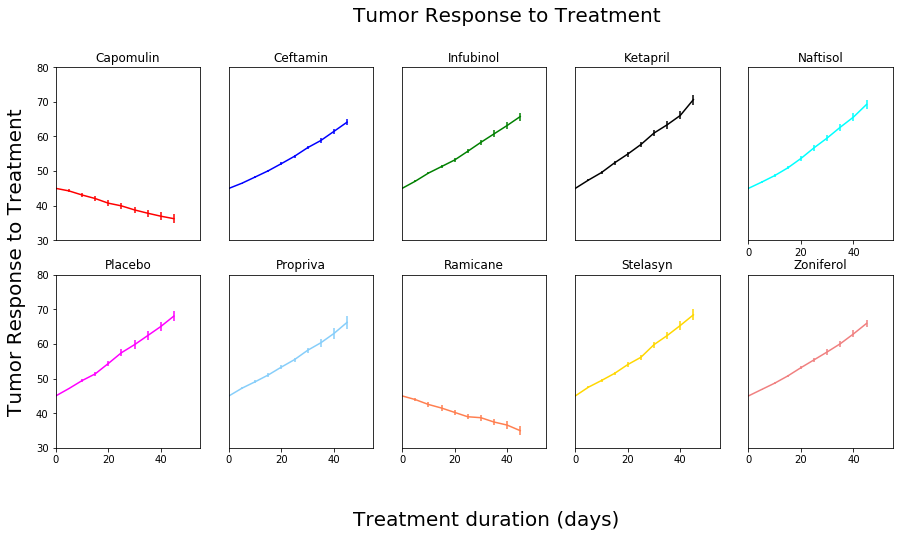

In [53]:
#Depict the tumor volume over time by treatment type and its standard error

fig, axes = plt.subplots(nrows=2, ncols=5,  figsize=(15,7))

colors= ["red", "blue", "green", "black", "cyan", "magenta", "lightskyblue", "coral",\
          "gold", "lightcoral"]
counter=0
for ax, i in zip(axes.flat, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",\
          "Stelasyn", "Zoniferol"]):
    #ax.plot( mean_tumor_columns.index, mean_tumor_columns.loc[:,i].values,\
            #             color=colors[counter], label=i, marker="o", linewidth=.1)
    ax.errorbar(mean_tumor_columns.index, mean_tumor_columns.loc[:,i].values,\
                 yerr=sem_tumor_columns.loc[:,i].values, color=colors[counter])
    counter += 1
    ax.axis([0, 55, 30, 80])
    #ax.axis('off')
    ax.yaxis.set_visible(False)
    
    if counter<5:
        ax.xaxis.set_visible(False)
        
    if counter == 1 :
        ax.yaxis.set_visible(True)
    
    if counter == 6 :
        ax.yaxis.set_visible(True)


    ax.title.set_text(i)
    plt.legend(loc="best" )

fig.text(0.4, 1, "Tumor Response to Treatment",
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=20)

fig.text(0.08, .8, "Tumor Response to Treatment",
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=20, rotation="vertical")

fig.text(0.4, 0, "Treatment duration (days)",
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=20)

plt.show()   


## Metastatic Response to Treatment

In [29]:
# Store the the number of metastatic sites Data Grouped by Drug and Timepoint 
grouped_drug_ms = dataset.groupby(['Drug', 'Metastatic Sites'])
mean_metastatic = pd.DataFrame(grouped_drug_tp['Metastatic Sites'].mean()).reset_index()
mean_metastatic.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [30]:
# Store the Standard Error of the number of metastatic sites Grouped by Drug and Timepoint
seam_metastatic = pd.DataFrame(grouped_drug_tp['Metastatic Sites'].sem()).reset_index()
mean_metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [54]:
# Create a dataframe wich contains a column for each drug storing the number of "Metastatic Sites"
mean_ms_columns = mean_metastatic.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
mean_ms_columns.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [32]:
# Create a dataframe wich contains a column for each drug storing the estandar error of "Metastatic Sites"
sem_ms_columns = seam_metastatic.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
sem_ms_columns.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


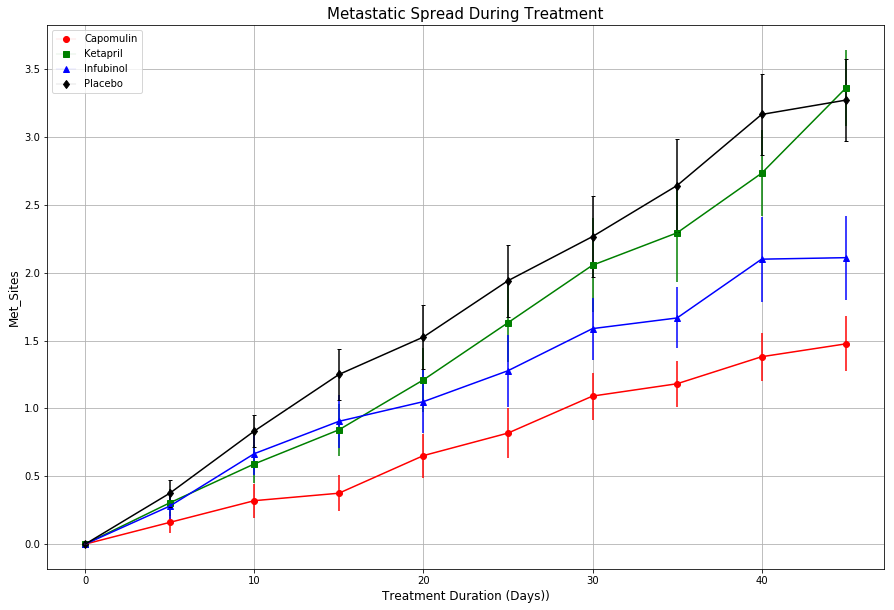

In [33]:
#Depict the number of metastatic sites over time for the main four treatments and its standard error
plt.figure(figsize=(15, 10))

Capomulin = plt.plot( mean_ms_columns.index, mean_ms_columns.loc[:,"Capomulin"].values,\
                     color="red", label="Capomulin", marker="o", linewidth=.1)
plt.errorbar(mean_ms_columns.index, mean_ms_columns.loc[:,"Capomulin"].values,\
             yerr=sem_ms_columns.loc[:,"Capomulin"].values, color="red")

Ketapril = plt.plot( mean_ms_columns.index, mean_ms_columns.loc[:,"Ketapril"].values,\
                    color="green", label="Ketapril", marker="s", linewidth=.1)
plt.errorbar(mean_ms_columns.index, mean_ms_columns.loc[:,"Ketapril"].values,\
             yerr=sem_ms_columns.loc[:,"Ketapril"].values, color="green")

Ceftamin = plt.plot( mean_ms_columns.index, mean_ms_columns.loc[:,"Infubinol"].values,\
                    color="blue", label="Infubinol", marker="^", linewidth=.1)
plt.errorbar(mean_ms_columns.index, mean_ms_columns.loc[:,"Infubinol"].values,\
             yerr=sem_ms_columns.loc[:,"Infubinol"].values, color="blue")

Placebo = plt.plot( mean_ms_columns.index, mean_ms_columns.loc[:,"Placebo"].values,\
                    color="black", label="Placebo", marker="d", linewidth=.1)
plt.errorbar(mean_ms_columns.index, mean_ms_columns.loc[:,"Placebo"].values,\
             yerr=sem_ms_columns.loc[:,"Placebo"].values, color="black", capsize=2)


plt.grid()
plt.legend(loc="best" )

plt.title("Metastatic Spread During Treatment", fontsize=15)
plt.xlabel("Treatment Duration (Days))", fontsize=12)
plt.ylabel("Met_Sites", fontsize=12)

plt.show()

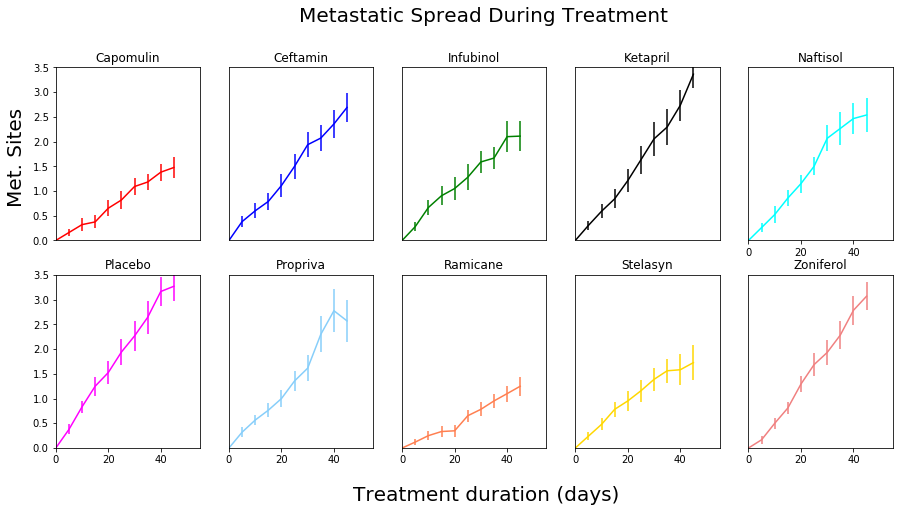

In [35]:
#Depict the number of metastatic sites over time by treatment type and its standard error
fig, axes = plt.subplots(nrows=2, ncols=5,  figsize=(15,7))

colors= ["red", "blue", "green", "black", "cyan", "magenta", "lightskyblue", "coral",\
          "gold", "lightcoral"]
counter=0
for ax, i in zip(axes.flat, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",\
          "Stelasyn", "Zoniferol"]):
    #ax.plot( mean_tumor_columns.index, mean_tumor_columns.loc[:,i].values,\
            #             color=colors[counter], label=i, marker="o", linewidth=.1)
    ax.errorbar(mean_ms_columns.index, mean_ms_columns.loc[:,i].values,\
                 yerr=sem_ms_columns.loc[:,i].values, color=colors[counter])
    counter += 1
    ax.axis([0, 55, 0, 3.5])
    ax.title.set_text(i)
    plt.legend(loc="best" )
    
    ax.yaxis.set_visible(False)
    
    if counter<5:
        ax.xaxis.set_visible(False)
        
    if counter == 1 :
        ax.yaxis.set_visible(True)
    
    if counter == 6 :
        ax.yaxis.set_visible(True)

fig.text(0.35, 1, "Metastatic Spread During Treatment",
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=20)

fig.text(0.08, .8, "Met. Sites",
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=20, rotation="vertical")

fig.text(0.4, 0.05, "Treatment duration (days)",
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=20)

plt.show() 

## Survival Rates

In [39]:
# Store the number of mice Data Grouped by Drug and Timepoint 
mouse_id = dataset.groupby(['Drug', 'Timepoint'])
count_mouse_id = pd.DataFrame(grouped_drug_tp["Mouse ID"].count()).reset_index()
count_mouse_id.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [40]:
# Create a dataframe wich contains a column for each drug storing the number of mice 
mouse_columns = count_mouse_id.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
mouse_columns


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [57]:
# Calculate a new dataframe which stores the survival rate of the mice per treatmen by timepoint 
total=[]
mouse_columns2=copy(mouse_columns)
for i in range(len(mouse_columns2.columns)):
    sum=mouse_columns2.iloc[0,i]
    total.append(sum)

for i in range(len(mouse_columns2.columns)):
    mouse_columns2.iloc[:, i] = (mouse_columns.iloc[:, i]/ total[i])*100
    
mouse_columns2


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


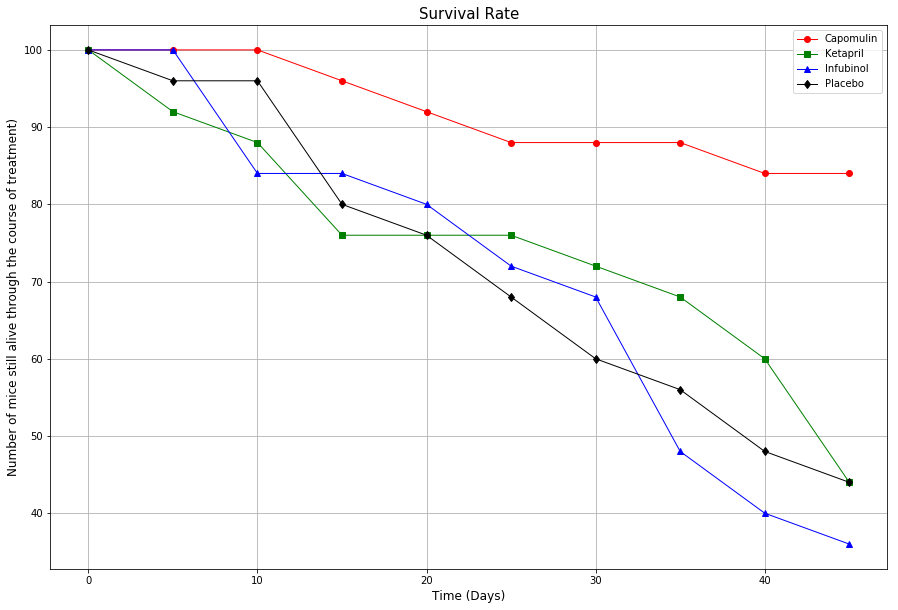

In [59]:
#Depict the survival rate over time for the most important treatments
plt.figure(figsize=(15, 10))

Capomulin = plt.plot( mouse_columns2.index, mouse_columns2.loc[:,"Capomulin"].values,\
                     color="red", label="Capomulin", marker="o", linewidth=1)


Ketapril = plt.plot( mouse_columns2.index, mouse_columns2.loc[:,"Ketapril"].values,\
                    color="green", label="Ketapril", marker="s", linewidth=1)


Ceftamin = plt.plot( mouse_columns2.index, mouse_columns2.loc[:,"Infubinol"].values,\
                    color="blue", label="Infubinol", marker="^", linewidth=1)


Placebo = plt.plot( mouse_columns2.index, mouse_columns2.loc[:,"Placebo"].values,\
                    color="black", label="Placebo", marker="d", linewidth=1)


plt.grid()
plt.legend(loc="best" )

plt.title("Survival Rate", fontsize=15)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Number of mice still alive through the course of treatment)", fontsize=12)

plt.show()

## Summary Bar Graph

In [309]:
# Calculate the volume change in percent for the main treatments
mean_tumor_columns
initial_volume = []
final_volume = []
change=[]

for i in range(len(mean_tumor_columns.columns)):
    initial_volume.append(mean_tumor_columns.iloc[0,i])
    final_volume.append(mean_tumor_columns.iloc[-1,i])

for j in range(len(initial_volume)):
    change.append(((final_volume[j]/initial_volume[j])-1)*100)


type(change)
index = mean_tumor_columns.columns
summary=pd.DataFrame(change, index=[index.values], columns=["change (%)"])
summary

,change (%)
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


# 

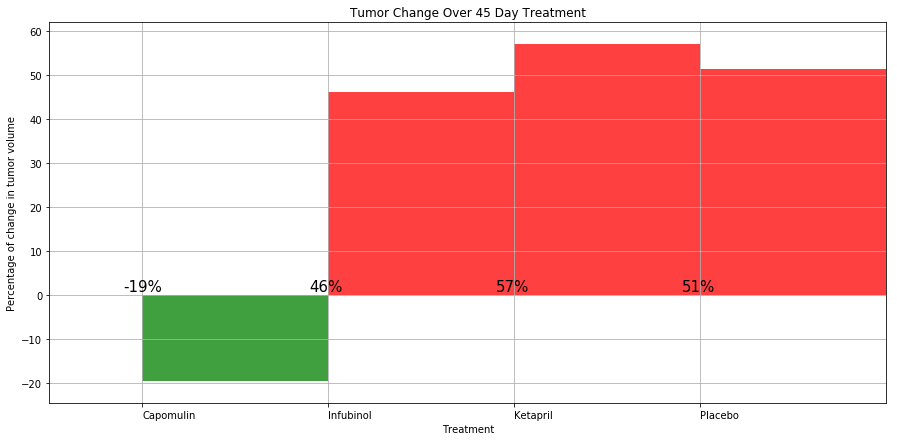

In [45]:
#Depict the percentage of change in tumor volume for the most important treatments

treatment = ('Capomulin', 'Infubinol', "Ketapril", "Placebo")
percentage = (-19.475303, 46.123472, 57.028795, 51.297960)

x_axis = np.arange(0, len(treatment))
tick_locations = []

fig, axes = plt.subplots( figsize=(15,7))

for x in x_axis:
    tick_locations.append(x)

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Treatment")
plt.ylabel("Percentage of change in tumor volume")

plt.xlim(-.5, len(treatment))
plt.ylim(min(percentage) - 5, max(percentage) + 5)

fg=plt.bar(x_axis, percentage, color=("green", "red", "red", "red"), alpha=0.75, align="edge", width=1)
plt.xticks(tick_locations, treatment, ha="left")

plt.grid()

for a,b in zip(x_axis, percentage):
    b= "{0:.0f}%".format(b)
    plt.text(a-.1, 1, str(b), fontsize=15 )
plt.show()


fig.show()